In [91]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [92]:
from collections import Counter
from sklearn.cluster import OPTICS
import pandas as pd
from src.utils_clustering import *
import time

In [93]:
N_CLASSES = 15

In [94]:
DATASET_FILE_NAME = "s1"
file_path = rf'..\data\processed\{DATASET_FILE_NAME}.txt'
processed_data = pd.read_csv(file_path)

In [95]:
# Start measuring time
start_time = time.time()

optics_clustering = OPTICS(min_samples=50, xi=0.001, min_cluster_size=0.05)
labels_pred = optics_clustering.fit_predict(processed_data)

# Measure elapsed time
end_time = time.time()
running_time = end_time - start_time
running_time_in_seconds = running_time / 60
running_time_in_seconds

0.03051248788833618

In [96]:
cluster_distribution = Counter(labels_pred)
print("Predicted Distribution: ",cluster_distribution)

Predicted Distribution:  Counter({3: 358, 2: 348, 5: 348, 12: 346, 11: 338, 1: 337, 8: 335, 10: 333, 9: 332, 14: 332, 7: 325, 6: 312, 13: 312, 4: 309, 0: 298, -1: 37})


In [97]:
LABELS_FILE_NAME = 's1-label'
labels_true = load_labels_from_file(rf'..\data\label\{LABELS_FILE_NAME}.pa', len(labels_pred))
cluster_distribution = Counter(labels_true)
print(cluster_distribution)

Counter({13: 350, 14: 350, 15: 350, 12: 349, 11: 347, 10: 342, 9: 341, 8: 338, 7: 334, 6: 326, 5: 325, 4: 318, 2: 316, 3: 314, 1: 300})


In [98]:
clustering_algorithm_name = 'OPTICS_clustering'
dataset_name = DATASET_FILE_NAME
results_path = r'../results/metrics/results.csv'

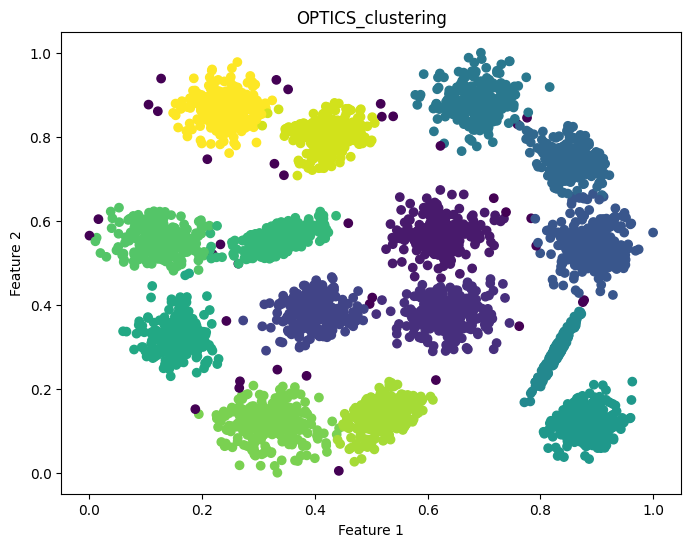

In [99]:
plot_clusters(processed_data, labels_pred, title=clustering_algorithm_name)

In [100]:
labels_pred = map_clusters_to_ground_truth_optics(labels_true, labels_pred)

Confusion Matrix:


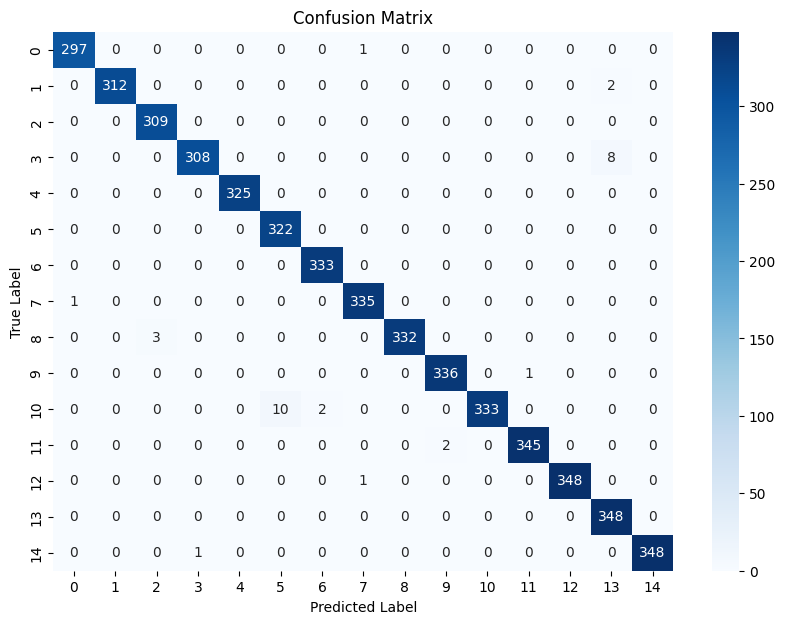


Overall Accuracy: 98.62%
This represents the proportion of all data points that were correctly grouped by the clustering algorithm.


In [101]:
generate_confusion_matrix(labels_true, labels_pred, N_CLASSES)

In [102]:
algorithm_params = optics_clustering.get_params()
algorithm_details = str(algorithm_params)
algorithm_details

"{'algorithm': 'auto', 'cluster_method': 'xi', 'eps': None, 'leaf_size': 30, 'max_eps': inf, 'memory': None, 'metric': 'minkowski', 'metric_params': None, 'min_cluster_size': 0.05, 'min_samples': 50, 'n_jobs': None, 'p': 2, 'predecessor_correction': True, 'xi': 0.001}"

In [103]:
inf = float('inf')

In [104]:
optics_clustering = OPTICS(**eval(algorithm_details))

In [105]:
# Evaluate and save results
evaluate_clustering(X=processed_data, labels_true=labels_true, labels_pred=labels_pred,
                    clus_algo_name=clustering_algorithm_name, dataset_name=dataset_name, 
                    results_path=results_path, algorithm_details=algorithm_details, 
                    running_time=running_time)